In [161]:
# snippet for importing local modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
	sys.path.append(module_path)

# Семейства вероятностных распределений

In [162]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from utils.summary_analysis import analysis, print_analysis


SIZE = 50


colors = ['r', 'g', 'b', 'c', 'y']
scales = [0.5, 1.0, 1.2, 1.5, 2.0]
dists = [
	np.random.exponential(size=SIZE, scale=scales[0]),
	np.random.exponential(size=SIZE, scale=scales[1]),
	np.random.exponential(size=SIZE, scale=scales[2]),
	np.random.exponential(size=SIZE, scale=scales[3]),
	np.random.exponential(size=SIZE, scale=scales[4]),
]

## Суммарный анализ

In [163]:
analyzes = list(map(analysis, dists))

# for info in analyzes:
	# print_analysis(info)

## CDF - Функция распределения

In [179]:
lt_data = {}
pd_data = {}
ut_data = {}
i_data = {}

indexes = [0.1, 1.0, 5.0, 10.0, 30.0]
coef = (SIZE - 1) / 30.0

for i in range(0, len(dists)):
	x = np.sort(dists[i])

	# для каждого индекса из массива индекса высчитывается
	# нужный элемент из массива исков, далее для него
	# вычисляются функция распределения и функция
	# плотности вероятности
	lt_data['dist{}'.format(i + 1)] = np.array([
		stats.expon.cdf(
			x[int(j * coef)], scale=scales[i]
		) for j in indexes
	])

	pd_data['dist{}'.format(i + 1)] = np.array([
		stats.expon.pdf(
			x[int(j * coef)], scale=scales[i]
		) for j in indexes
	])

	ut_data['dist{}'.format(i + 1)] =\
		1 - lt_data['dist{}'.format(i + 1)]

	i_data['dist{}'.format(i + 1)] = np.array([
		stats.expon.ppf(
			x[int(j * coef)], scale=scales[i]
		) for j in indexes
	])

l_df = pd.DataFrame(
	lt_data,
	index=indexes
)
p_df = pd.DataFrame(
	pd_data,
	index=indexes
)
u_df = pd.DataFrame(
	ut_data,
	index=indexes
)
i_df = pd.DataFrame(
	i_data,
	index=indexes
)

print('Lower Tail Area', l_df, sep='\n', end='\n\n')
print('Probability Mass', p_df, sep='\n', end='\n\n')
print('Upper Tail Area', u_df, sep='\n', end='\n\n')
print('Inverse CDF', i_df, sep='\n')

Lower Tail Area
         dist1     dist2     dist3     dist4     dist5
0.1   0.005564  0.000304  0.008166  0.003908  0.012720
1.0   0.018181  0.030720  0.023183  0.018201  0.022293
5.0   0.115128  0.161312  0.200309  0.144620  0.173905
10.0  0.322531  0.232147  0.398250  0.315266  0.312089
30.0  0.988891  0.994482  0.976819  0.994066  0.970210

Probability Mass
         dist1     dist2     dist3     dist4     dist5
0.1   1.988872  0.999696  0.826528  0.664062  0.493640
1.0   1.963639  0.969280  0.814014  0.654533  0.488853
5.0   1.769744  0.838688  0.666409  0.570253  0.413048
10.0  1.354939  0.767853  0.501459  0.456489  0.343956
30.0  0.022218  0.005518  0.019318  0.003956  0.014895

Upper Tail Area
         dist1     dist2     dist3     dist4     dist5
0.1   0.994436  0.999696  0.991834  0.996092  0.987280
1.0   0.981819  0.969280  0.976817  0.981799  0.977707
5.0   0.884872  0.838688  0.799691  0.855380  0.826095
10.0  0.677469  0.767853  0.601750  0.684734  0.687911
30.0  0.011109

### График

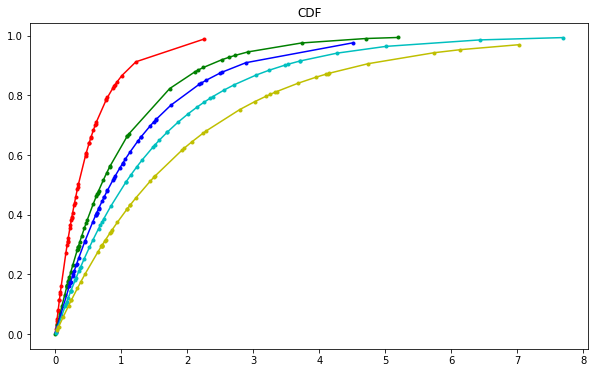

In [165]:
def cdf(data, scale, plot, color):
	plt.title('CDF')

	x = np.sort(data)
	y = stats.expon.cdf(x, scale=scale)

	plot.plot(x, y, '.', color=color)
	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	cdf(dists[i], scales[i], ax, colors[i])

## PPF - inverse CDF - Обратная функция распределения

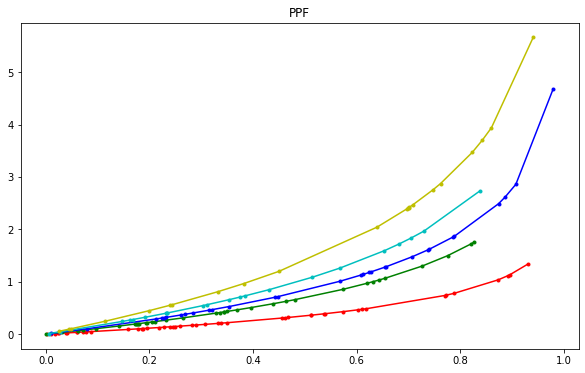

In [166]:
def cdf(data, scale, plot, color):
	plt.title('PPF')

	x = np.sort(data)
	y = stats.expon.ppf(x, scale=scale)

	plot.plot(x, y, '.', color=color)
	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	cdf(dists[i], scales[i], ax, colors[i])

## PDF - Функция плотности вероятности

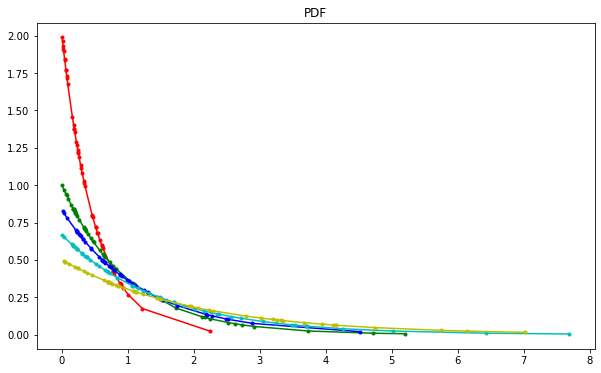

In [167]:
def pdf(data, scale, plot, color):
	plt.title('PDF')

	x = np.sort(data)
	y = stats.expon.pdf(x, scale=scale)

	plot.plot(x, y, '.', color=color)
	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	pdf(dists[i], scales[i], ax, colors[i])

## Survivor Function - Функция выжимаемости

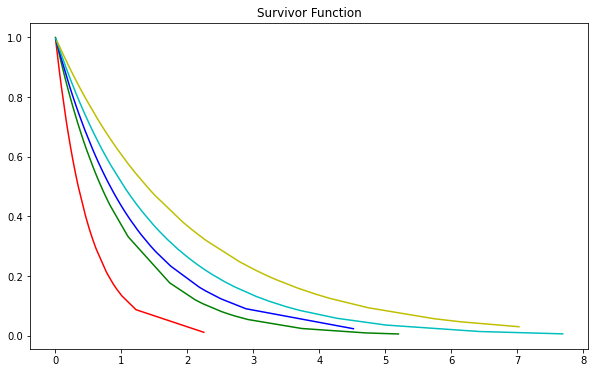

In [168]:
def sf(data, scale, plot, color):
	plt.title('Survivor Function')

	x = np.sort(data)
	y = stats.expon.sf(x, scale=scale)

	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	sf(dists[i], scales[i], ax, colors[i])

## Log Survivor Function - Логарифм функции выживаемости

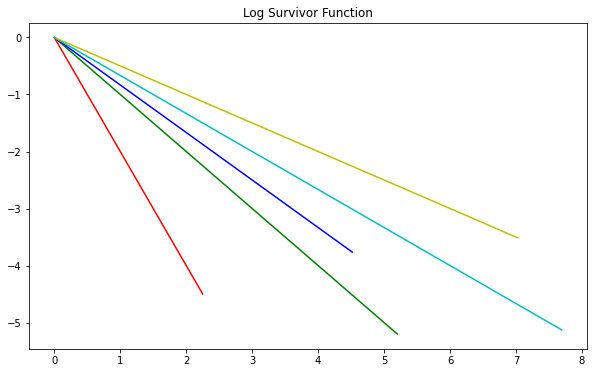

In [169]:
def logsf(data, scale, plot, color):
	plt.title('Log Survivor Function')

	x = np.sort(data)
	y = stats.expon.logsf(x, scale=scale)

	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	logsf(dists[i], scales[i], ax, colors[i])

## Hazard Function - Функция риска

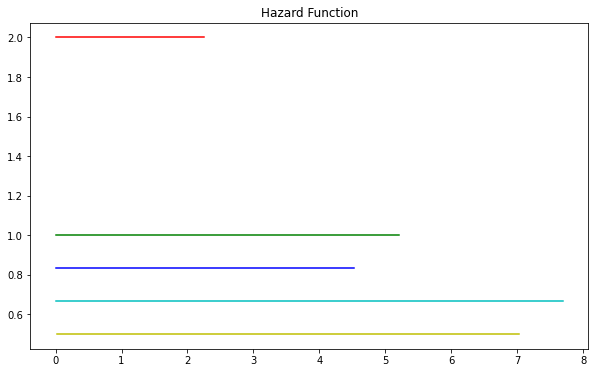

In [170]:
def hazard(data, scale, plot, color):
	plt.title('Hazard Function')

	x = np.sort(data)
	y1 = stats.expon.pdf(x, scale=scale)
	y2 = stats.expon.sf(x, scale=scale)

	y = y1 / y2

	plot.plot(x, y, '-', color=color)


fig, ax = plt.subplots(figsize=(10,6))

for i in range(0, len(dists)):
	hazard(dists[i], scales[i], ax, colors[i])